In [28]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid') # palette="pastel" 

import warnings
warnings.filterwarnings("ignore")

In [2]:
##### Mobile_Electronics에 대한 아마존 리뷰 데이터를 가져온다. ##### 
df = pd.read_csv("D:/amazone_reviews/amazon_reviews_us_Mobile_Electronics_v1_00.tsv", sep='\t', error_bad_lines=False)
df.head()

b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


In [6]:
##### 데이터셋의 형태 파악 ##### 
print(df.shape)
print('---------------------------------------------------')
print(df.dtypes)
print('---------------------------------------------------')
print(df.info())

(104852, 15)
---------------------------------------------------
marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104852 entries, 0 to 104851
Data columns (total 15 columns):
marketplace          104852 non-null object
customer_id          104852 non-null int64
review_id            104852 non-null object
product_id           104852 non-null object
product_parent       104852 non-null int64
product_title        104852 non-null object
product_category     104852 non-null object
star_rating      

In [7]:
##### ==> 데이터 크기는 104852 rows x  15 cols, 변수는 문자열/정수/실수 형태가 혼재되어 있다.) #####

In [8]:
##### 불필요한 컬럼 제거 #####
df = df.loc[:, ['review_body', 'star_rating']]
df = df.query('star_rating != 3.0')
df.head()

,review_body,star_rating
0,"As advertised. Everything works perfectly, I'm...",5.0
1,it's great,5.0
2,These work great and fit my life proof case fo...,5.0
3,Work very well but couldn't get used to not he...,4.0
4,"Be careful with these products, I have bought ...",2.0


In [9]:
##### 별점을 기준으로 긍정적 의견을 구분한다.(4,5점이면 긍정) ##### 
def get_sentiment(value):
    if value > 3:
        return 1
    else:
        return 0
    
df['sentiment'] = df['star_rating'].apply(get_sentiment)
df.head()

,review_body,star_rating,sentiment
0,"As advertised. Everything works perfectly, I'm...",5.0,1
1,it's great,5.0,1
2,These work great and fit my life proof case fo...,5.0,1
3,Work very well but couldn't get used to not he...,4.0,1
4,"Be careful with these products, I have bought ...",2.0,0


In [10]:
##### data cleansing: 별점이 매겨지지 않은 데이터는 제거한다 #####
df.star_rating.unique()

array([ 5.,  4.,  2.,  1., nan])

In [12]:
df.dropna(inplace = True)
df.star_rating.unique()

array([5., 4., 2., 1.])

5.0    52197
4.0    18063
1.0    17571
2.0     7298
Name: star_rating, dtype: int64


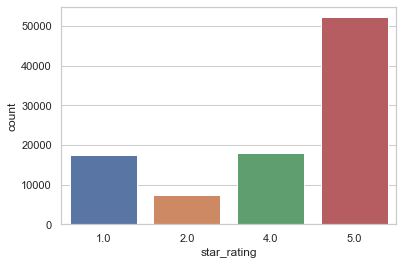

In [13]:
##### 별점의 분포를 살펴보자 ##### 
print(df['star_rating'].value_counts())
sns.countplot(x='star_rating', data=df)

In [14]:
##### data cleansing: 중복된 리뷰는 제거 & 변수타입 설정 & 텍스트 전체 소문자로 변환 #####
import string
df = df.drop_duplicates(subset={'review_body', 'star_rating'})

df.dropna(inplace=True)
df.loc[:, 'star_rating'] = df['star_rating'].astype(int)
df.loc[:, 'review_body'] = df['review_body'].astype(str).str.lower()
df.head()

,review_body,star_rating,sentiment
0,"as advertised. everything works perfectly, i'm...",5,1
1,it's great,5,1
2,these work great and fit my life proof case fo...,5,1
3,work very well but couldn't get used to not he...,4,1
4,"be careful with these products, i have bought ...",2,0


1    67999
0    24720
Name: sentiment, dtype: int64


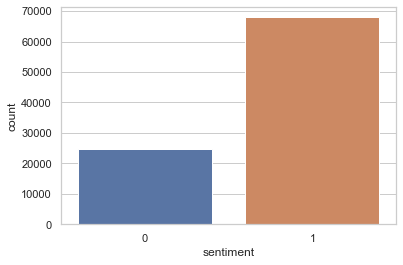

In [15]:
##### 긍정적인 리뷰의 비중을 살펴보자 (별점 4,5 = 1) ##### 
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)

In [16]:
##### Python Wordcloud Visualization #####
!python -m pip install wordcloud

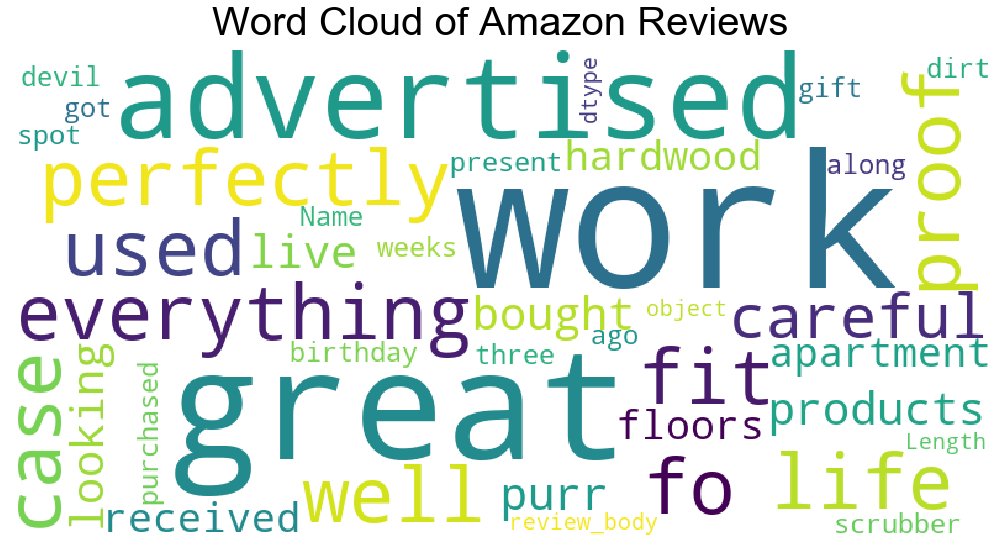

In [25]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=150, 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 50,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=(14,8))
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df['review_body'], title="Word Cloud of Amazon Reviews")

In [50]:
##### 긍정적 리뷰와 부정적 리뷰를 나누어 주요 키워드들을 살펴본다. #####
df_good = df[(df.sentiment == 1)]
df_bad = df[(df.sentiment == 0)]

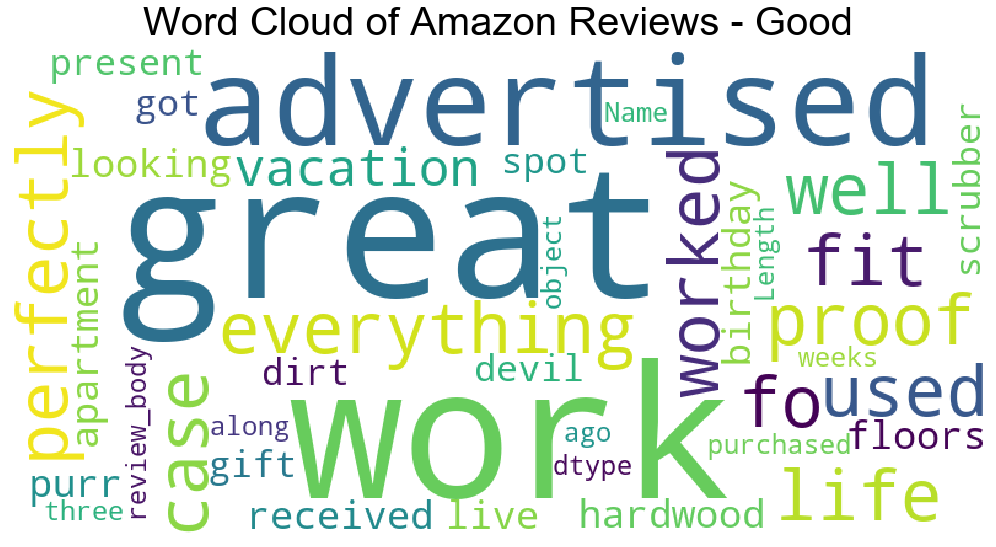

In [48]:
plot_wordcloud(df_good['review_body'], title="Word Cloud of Amazon Reviews - Good")

In [52]:
df_good.head(20)

,review_body,star_rating,sentiment,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len
0,"as advertised. everything works perfectly, i'm...",5,1,26,24,139,12,6,4.384615
1,it's great,5,1,2,2,10,1,1,4.500000
2,these work great and fit my life proof case fo...,5,1,13,13,60,5,0,3.692308
3,work very well but couldn't get used to not he...,4,1,20,20,101,11,2,4.100000
7,worked great for vacation,5,1,4,4,25,1,0,5.500000
8,"this is a very good item, it provide me the so...",4,1,14,14,63,9,3,3.571429
9,i love my recorder. bought it obviously becaus...,5,1,70,56,394,28,20,4.614286
10,"great sound great battery beach, work, park, a...",5,1,10,8,67,0,3,5.800000
12,love it,5,1,2,2,7,1,0,3.000000
15,worked with mhd flasher for android. used to ...,5,1,16,15,99,4,3,5.187500


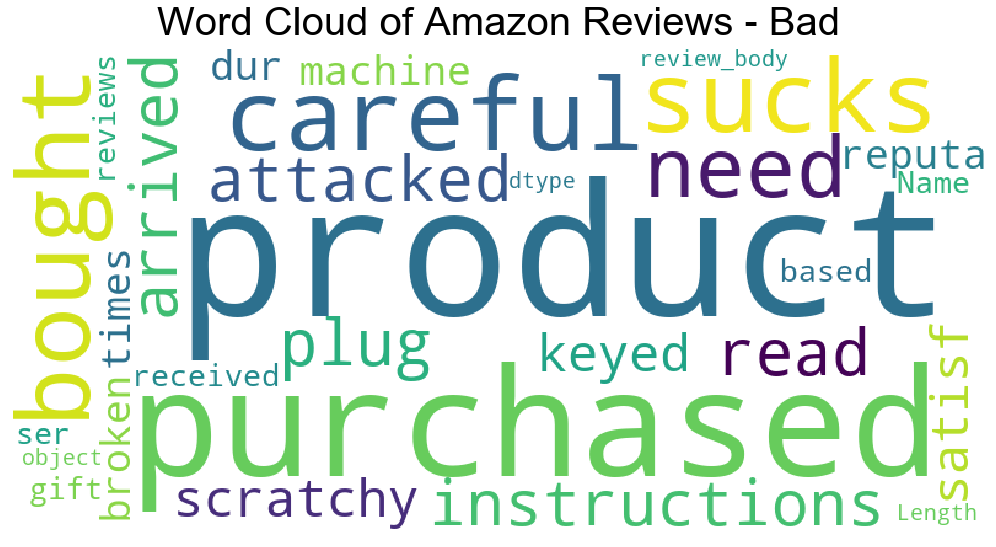

In [49]:
plot_wordcloud(df_bad['review_body'], title="Word Cloud of Amazon Reviews - Bad")

In [51]:
df_bad.head(20)

,review_body,star_rating,sentiment,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len
4,"be careful with these products, i have bought ...",2,0,24,23,141,13,6,4.916667
13,sucks,1,0,1,1,5,0,0,5.000000
14,u need to plug in both,2,0,6,6,22,3,0,2.833333
16,"just arrived, read instructions and attacked ...",2,0,123,84,653,57,24,4.292683
21,scratchy when keyed up,2,0,4,4,22,2,0,4.750000
27,i was excited to get this product because it l...,1,0,171,108,935,95,19,4.415205
37,"first off, we need the operating band this is ...",1,0,32,28,193,14,5,5.000000
52,does not fit xl,1,0,4,4,15,2,0,3.000000
54,purchased two of these based on a wide variety...,2,0,75,56,392,38,9,4.200000
56,the compass is not reliable. i don't really k...,2,0,12,12,61,7,2,4.083333
